In [4]:
import cv2
import matplotlib.pyplot as plt

In [73]:
def display_plot(image, title='', cmap=None):
    plt.imshow(image,cmap=cmap)
    plt.title(title)
    plt.show()

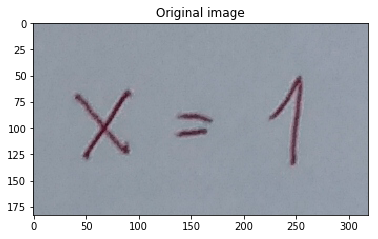

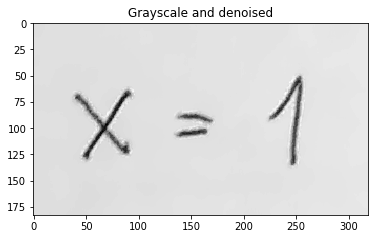

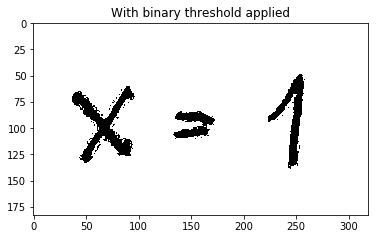

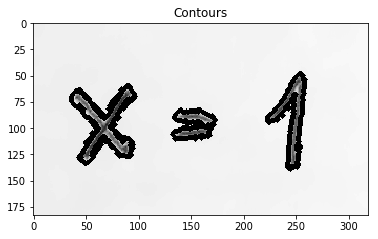

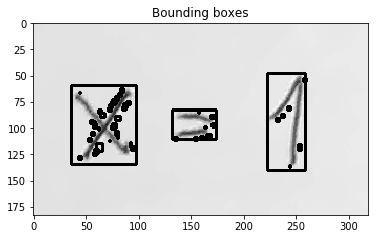

In [87]:
#Read image
img = cv2.imread('equations/1.png')
display_plot(img,'Original image',None)


#Convert to grayscale and denoise
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.fastNlMeansDenoising(img)
display_plot(img,'Grayscale and denoised','gray')


#Find contours
#1. Add binary threshold (here we use 50% of brightness as our threshold)
ret, thresh = cv2.threshold(img, 150, 255, 0)
display_plot(thresh,'With binary threshold applied','gray')

#2. Find and draw contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#first contour is usually the whole image - remove it
contours=contours[1:]
img_contours = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 3)
display_plot(img_contours, 'Contours' , 'gray')


#Find bounding boxes
img_boxes = img.copy()
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(img_boxes,(x,y),(x+w,y+h),(0,255,0),2)
display_plot(img_boxes,'Bounding boxes', 'gray')